# **DEEP LEARNING ASSESSMENT 6G7V0024**
## **Ifeoma Chinyere Edeh**
## **23696844**

##    **BREAST CANCER IMAGERY DATASET PROJECT**


![image](https://radiologyassistant.nl/assets/3ca-examples.jpg)

### The objectives of this project is to:
* Reveiw the deep neural network (DNN) training procedure
* Solve image classifcation with Neural Networks (NN)

The Project solution is divided into the following sections:

**************
   1. Import Libaries and Packages
   2. Dataset Loading and Preprocessing
   3. Data Splitting and Shape
   4. Model (Classification, Evaluation and Prediction)
     - ResNet Model
     - Custom CNN
     

## Import Libaries and Packages

In [1]:
import pandas as pd # libary for data manipulation
import numpy as np # linear algebra

# Libraries for image processing and pre-processing
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

# libraries to build the neural networks
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet18
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from tqdm import tqdm

#  library for metrics and evaluation
import random
from sklearn.metrics import confusion_matrix , classification_report

# libraries for plotting and data visualization
import matplotlib.pyplot as plt
import seaborn as sns

 Highlights:

 ------
  I utilized the torchvision a libary of PyTorch to create various fuctionalities to transform the image, build and train the neural networks.

## Data Loading And Pre-Processing

### Load the dataset

In [2]:
# Install a package to download data from Kaggle
!pip install -q opendatasets

In [3]:
import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset/code')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ifeoma67
Your Kaggle Key: ··········


100%|██████████| 195M/195M [00:10<00:00, 19.3MB/s]


In [4]:
# Setting the directory to the folder containing the images
main_dir = "breast-ultrasound-images-dataset/Dataset_BUSI_with_GT"
# Assuming the dataset is in the same directory as the notebook

import os

# List all files in the directory
os.listdir(main_dir)

['malignant', 'normal', 'benign']

Highlight:

------

The dataset used is a Real-world breast ultrasound images  dataset on  Pubmed wedsite(https://pubmed.ncbi.nlm.nih.gov/31867417/) and uploaded on Kaggle.

The dataset was published by -------

Al-Dhabyani W, Gomaa M, Khaled H, Fahmy A. Dataset of breast ultrasound images. Data in Brief. 2020 Feb;28:104863. DOI: 10.1016/j.dib.2019.104863.


- The dataset consists of 780 images with an average image size of 500*500 pixels.
- The images are categorized into three classes, which are:
 -  Normal
 - Benign
 - Malignant.

### Preprocessing

I employed the Torchvision utilities for the preprocessing of the images, data wrapping and data augumentation. Since the data set are stored in folders, I can directly apply `torchvision.datasets.ImageFolder` for wrapping data without much effort.

In [5]:
# Define transformations for image preprocessing
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to a fixed size
    transforms.CenterCrop(224),     # Center crop to 224x224 (typical for many CNN architectures)
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image data
])

# Load the dataset from subfolders and apply transformations
dataset = ImageFolder(root=main_dir, transform=transform)


print(dataset.targets)

# Batch size for training, validation, and testing.
batch_size = 32


train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Create DataLoader objects for training, validation, and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

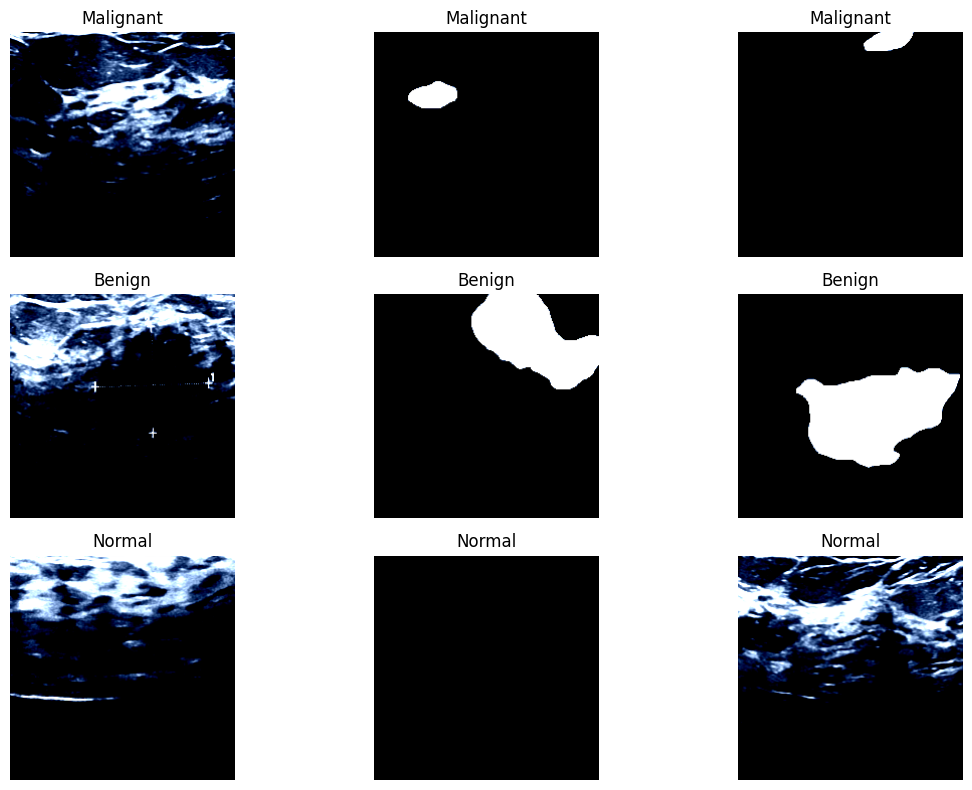

In [6]:
def plot_images_with_labels(images, labels, class_names, num_images=3):
    fig, axes = plt.subplots(len(class_names), num_images, figsize=(12, 8))

    for i, cls in enumerate(class_names):
        class_indices = np.where(labels == i)[0]
        class_images = images[class_indices][:num_images]

        for j in range(num_images):
            axes[i, j].imshow(class_images[j].permute(1, 2, 0))
            axes[i, j].set_title(class_names[i])
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

images = []
labels = []
class_names = ['Malignant', 'Benign', 'Normal']

for batch in test_loader:
    batch_images, batch_labels = batch
    images.append(batch_images)
    labels.append(batch_labels)

images = torch.cat(images, dim=0)
labels = torch.cat(labels, dim=0)

# Plot three images from each class with labels
plot_images_with_labels(images, labels, class_names)

## Data Splitting And Shape

In [7]:
train_size = len(train_dataset)
val_size = len(val_dataset)
test_size = len(test_dataset)

print(f"Training set size: {train_size} samples")
print(f"Validation set size: {val_size} samples")
print(f"Test set size: {test_size} samples")

Training set size: 1262 samples
Validation set size: 157 samples
Test set size: 159 samples


# Model


## ResNet Model : Pytorch

In [8]:
# Define the ResNet model architecture
class ResNetExpanded(nn.Module):
    def __init__(self):
        super(ResNetExpanded, self).__init__()
        self.resnet = resnet18(pretrained=True)
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Sequential(
            nn.Linear(num_ftrs, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 3)  # 3 classes: malignant and benign
        )

    def forward(self, x):
        x = self.resnet(x)
        return x


### Define Loss and Optimizer

In [9]:
# Initialize the model
model = ResNetExpanded()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 107MB/s]


### Train and Validation

In [10]:
# Training loop
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Initialize lists to store history
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch"):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            val_loss += criterion(outputs, labels).item()

            _, predicted_val = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_accuracy = correct_val / total_val
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Val Acc: {val_accuracies[-1]:.4f}")

Epoch 1/10: 100%|██████████| 40/40 [00:25<00:00,  1.54batch/s]


Epoch 1/10, Train Loss: 0.6988, Val Loss: 3.7075, Train Acc: 0.6926, Val Acc: 0.5605


Epoch 2/10: 100%|██████████| 40/40 [00:14<00:00,  2.85batch/s]


Epoch 2/10, Train Loss: 0.5152, Val Loss: 0.7098, Train Acc: 0.7821, Val Acc: 0.7197


Epoch 3/10: 100%|██████████| 40/40 [00:13<00:00,  2.86batch/s]


Epoch 3/10, Train Loss: 0.4285, Val Loss: 0.6027, Train Acc: 0.8193, Val Acc: 0.7580


Epoch 4/10: 100%|██████████| 40/40 [00:14<00:00,  2.83batch/s]


Epoch 4/10, Train Loss: 0.3481, Val Loss: 0.6107, Train Acc: 0.8669, Val Acc: 0.7771


Epoch 5/10: 100%|██████████| 40/40 [00:13<00:00,  2.87batch/s]


Epoch 5/10, Train Loss: 0.3115, Val Loss: 0.4616, Train Acc: 0.8827, Val Acc: 0.8089


Epoch 6/10: 100%|██████████| 40/40 [00:14<00:00,  2.85batch/s]


Epoch 6/10, Train Loss: 0.2889, Val Loss: 0.4566, Train Acc: 0.8962, Val Acc: 0.7898


Epoch 7/10: 100%|██████████| 40/40 [00:14<00:00,  2.80batch/s]


Epoch 7/10, Train Loss: 0.2398, Val Loss: 0.5143, Train Acc: 0.9136, Val Acc: 0.8025


Epoch 8/10: 100%|██████████| 40/40 [00:15<00:00,  2.67batch/s]


Epoch 8/10, Train Loss: 0.2265, Val Loss: 0.6182, Train Acc: 0.9105, Val Acc: 0.7771


Epoch 9/10: 100%|██████████| 40/40 [00:15<00:00,  2.55batch/s]


Epoch 9/10, Train Loss: 0.2203, Val Loss: 0.5263, Train Acc: 0.9176, Val Acc: 0.8280


Epoch 10/10: 100%|██████████| 40/40 [00:14<00:00,  2.80batch/s]


Epoch 10/10, Train Loss: 0.1362, Val Loss: 0.4860, Train Acc: 0.9556, Val Acc: 0.8471


## Model Evaluation : ResNet

### Epoch History : Accuracy And Loss

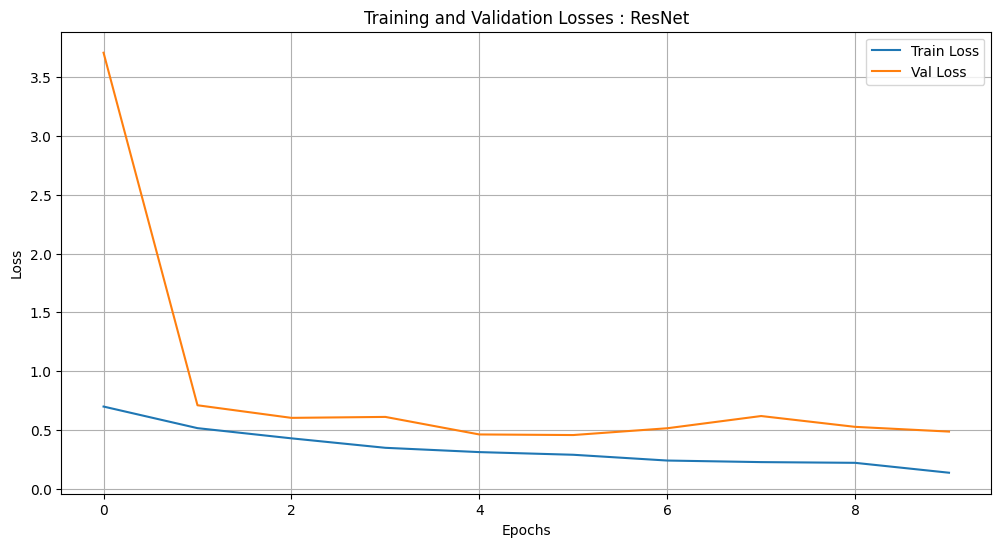

In [33]:
# Plotting the loss curves
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses : ResNet')
plt.grid()
plt.show()


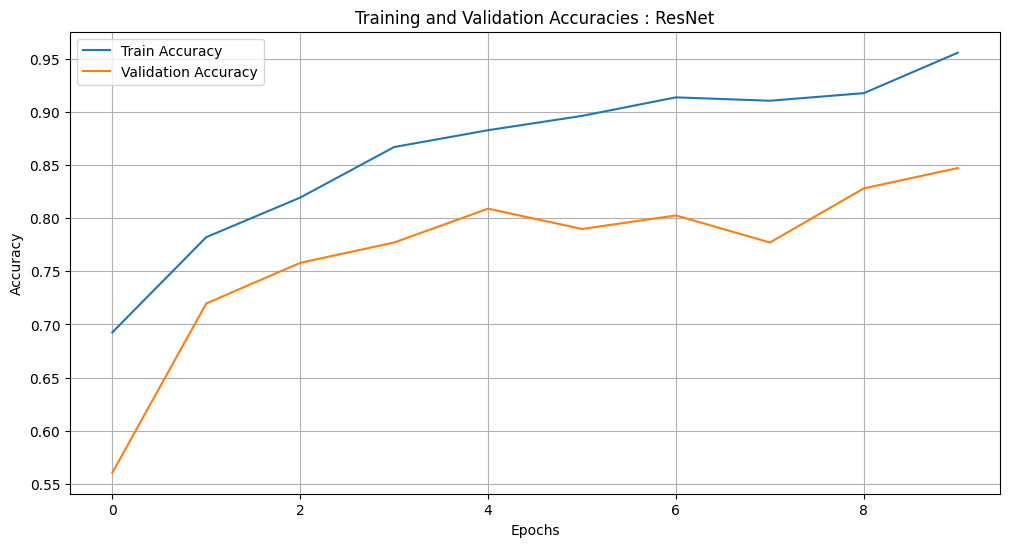

In [32]:
# Plotting training and validation accuracy curves
plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracies : ResNet')
plt.grid()
plt.show()

### Model Evaluation On Test Set : Classification Report

### Testing
The best model parameters were selected to produce the best validation accuracy.

In [12]:
# Testing
model.eval()
test_correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()

test_accuracy = test_correct / test_size
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8616


In [13]:
model.eval()
total_predicted = []
total_true = []

label_mapping = {0 : 'malignant' , 1 : 'benign' , 2 : 'normal'}

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Convert predicted and true labels to numpy arrays
        predicted = predicted.cpu().numpy()
        true = labels.cpu().numpy()

        # Collect predicted and true labels for each batch
        total_predicted.extend(predicted)
        total_true.extend(true)

# Calculate classification report for all batches combined
classification_rep = classification_report(total_true, total_predicted, target_names=label_mapping.values())
print("Classification Report for Testing Data:")
print(classification_rep)


Classification Report for Testing Data:
              precision    recall  f1-score   support

   malignant       0.87      0.95      0.91        95
      benign       0.80      0.85      0.82        41
      normal       1.00      0.52      0.69        23

    accuracy                           0.86       159
   macro avg       0.89      0.77      0.81       159
weighted avg       0.87      0.86      0.85       159



### Confusion Matrix

In [14]:
true_labels = []
predicted_labels = []

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(total_true, total_predicted)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[90  5  0]
 [ 6 35  0]
 [ 7  4 12]]


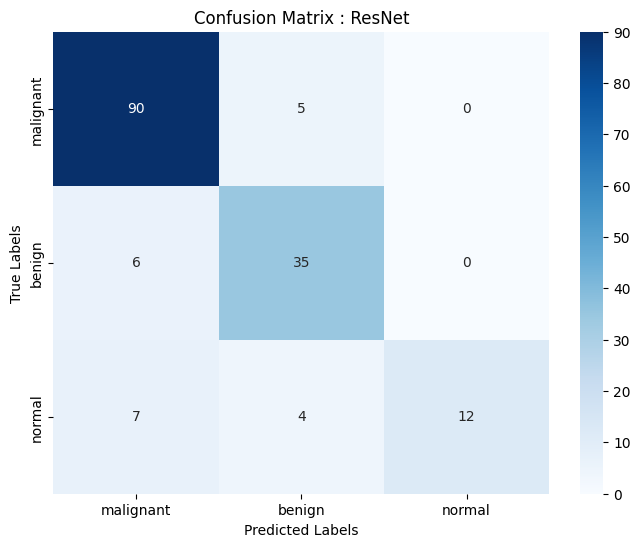

In [15]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(total_true, total_predicted)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix : ResNet")
plt.show()

### Plotting Predicted Images

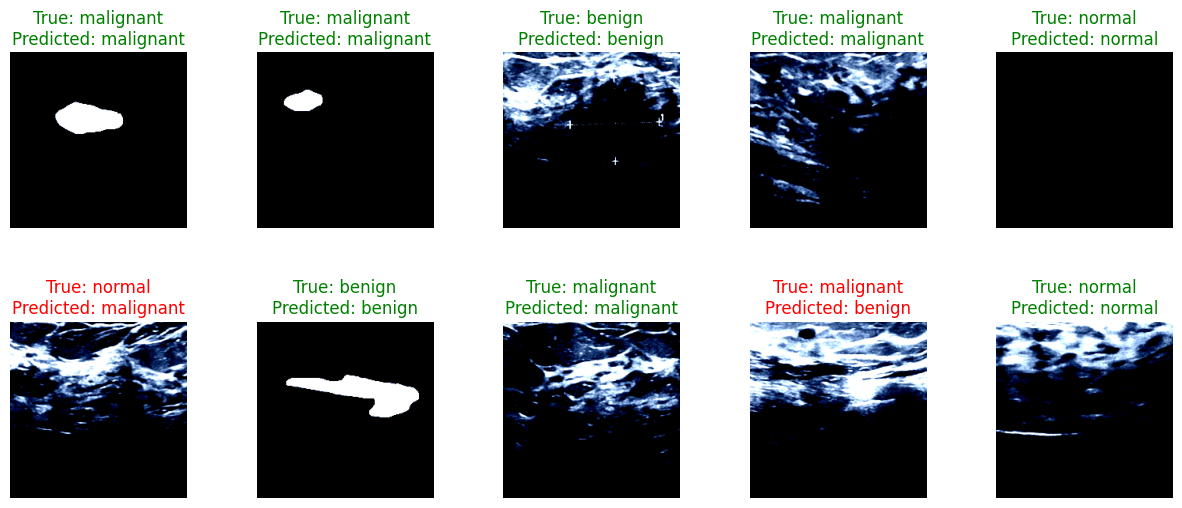

In [16]:
def plot_images(test_loader, model, label_mapping, device):
    model.eval()
    sample_images = []
    sample_true_labels = []
    sample_predicted_labels = []

    with torch.no_grad():
        total_batches = len(test_loader)

        batch_index = random.randint(0, total_batches - 1)

        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        images_np = images.cpu().numpy()
        labels_np = labels.cpu().numpy()
        predicted_np = predicted.cpu().numpy()

        # Randomly select 10 images from the batch
        indices = random.sample(range(len(images)), 10)
        sample_images = images_np[indices]
        sample_true_labels = labels_np[indices]
        sample_predicted_labels = predicted_np[indices]

    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, ax in enumerate(axs.flat):
        ax.imshow(np.transpose(sample_images[i], (1, 2, 0)))
        ax.axis("off")
        true_label = label_mapping[sample_true_labels[i]]
        predicted_label = label_mapping[sample_predicted_labels[i]]
        color = 'green' if sample_true_labels[i] == sample_predicted_labels[i] else 'red'
        ax.set_title(f'True: {true_label}\nPredicted: {predicted_label}', color=color)

    plt.show()

plot_images(test_loader, model, label_mapping, device)

# Model

## Custom CNN

In [17]:
# Define the custom CNN model architecture
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 3)  # Output for 3 classes: malignant, benign, normal

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(-1, 64 * 56 * 56)  # Flatten the output for fully connected layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x




### Define Loss and Optimizer

In [18]:
# Initialize the custom CNN model
custom_model = CustomCNN()

# Define loss function and optimizer for the custom CNN model
custom_criterion = nn.CrossEntropyLoss()
custom_optimizer = optim.Adam(custom_model.parameters(), lr=0.001)

### Train and Validation

In [19]:
# Training loop for the custom CNN model
custom_epochs = 10
custom_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
custom_model.to(custom_device)

custom_train_losses = []
custom_train_accuracies = []
custom_val_losses = []
custom_val_accuracies = []

for epoch in range(custom_epochs):
    custom_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader, desc=f"Custom CNN Epoch {epoch+1}/{custom_epochs}", unit="batch"):
        images, labels = images.to(custom_device), labels.to(custom_device)

        custom_optimizer.zero_grad()
        outputs = custom_model(images)
        loss = custom_criterion(outputs, labels)
        loss.backward()
        custom_optimizer.step()

        running_loss += loss.item()

        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_accuracy = correct_train / total_train
    custom_train_losses.append(running_loss / len(train_loader))
    custom_train_accuracies.append(train_accuracy)

    # Validation loop for the custom CNN model
    custom_model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(custom_device), labels.to(custom_device)
            outputs = custom_model(images)
            val_loss += custom_criterion(outputs, labels).item()

            _, predicted_val = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_accuracy = correct_val / total_val
    custom_val_losses.append(val_loss / len(val_loader))
    custom_val_accuracies.append(val_accuracy)

    print(f"Custom CNN Epoch {epoch+1}/{custom_epochs}, Train Loss: {custom_train_losses[-1]:.4f}, Val Loss: {custom_val_losses[-1]:.4f}, Train Acc: {custom_train_accuracies[-1]:.4f}, Val Acc: {custom_val_accuracies[-1]:.4f}")

Custom CNN Epoch 1/10: 100%|██████████| 40/40 [00:13<00:00,  2.92batch/s]


Custom CNN Epoch 1/10, Train Loss: 2.4419, Val Loss: 0.9835, Train Acc: 0.5238, Val Acc: 0.5541


Custom CNN Epoch 2/10: 100%|██████████| 40/40 [00:13<00:00,  2.92batch/s]


Custom CNN Epoch 2/10, Train Loss: 0.8226, Val Loss: 0.9029, Train Acc: 0.6854, Val Acc: 0.5796


Custom CNN Epoch 3/10: 100%|██████████| 40/40 [00:13<00:00,  2.91batch/s]


Custom CNN Epoch 3/10, Train Loss: 0.5302, Val Loss: 0.8590, Train Acc: 0.7726, Val Acc: 0.6433


Custom CNN Epoch 4/10: 100%|██████████| 40/40 [00:13<00:00,  2.90batch/s]


Custom CNN Epoch 4/10, Train Loss: 0.2899, Val Loss: 1.1710, Train Acc: 0.8906, Val Acc: 0.6369


Custom CNN Epoch 5/10: 100%|██████████| 40/40 [00:13<00:00,  2.93batch/s]


Custom CNN Epoch 5/10, Train Loss: 0.1180, Val Loss: 1.2736, Train Acc: 0.9612, Val Acc: 0.6369


Custom CNN Epoch 6/10: 100%|██████████| 40/40 [00:23<00:00,  1.71batch/s]


Custom CNN Epoch 6/10, Train Loss: 0.0360, Val Loss: 1.5879, Train Acc: 0.9905, Val Acc: 0.6433


Custom CNN Epoch 7/10: 100%|██████████| 40/40 [00:18<00:00,  2.17batch/s]


Custom CNN Epoch 7/10, Train Loss: 0.0353, Val Loss: 1.5941, Train Acc: 0.9905, Val Acc: 0.6497


Custom CNN Epoch 8/10: 100%|██████████| 40/40 [00:13<00:00,  2.94batch/s]


Custom CNN Epoch 8/10, Train Loss: 0.0203, Val Loss: 1.7528, Train Acc: 0.9968, Val Acc: 0.6624


Custom CNN Epoch 9/10: 100%|██████████| 40/40 [00:13<00:00,  2.92batch/s]


Custom CNN Epoch 9/10, Train Loss: 0.0109, Val Loss: 1.8947, Train Acc: 0.9968, Val Acc: 0.6369


Custom CNN Epoch 10/10: 100%|██████████| 40/40 [00:14<00:00,  2.85batch/s]


Custom CNN Epoch 10/10, Train Loss: 0.0102, Val Loss: 1.9326, Train Acc: 0.9968, Val Acc: 0.6497


## Model Evaluation : Custom CNN

### Epoch History (Accuracy And Loss) : Custom CNN

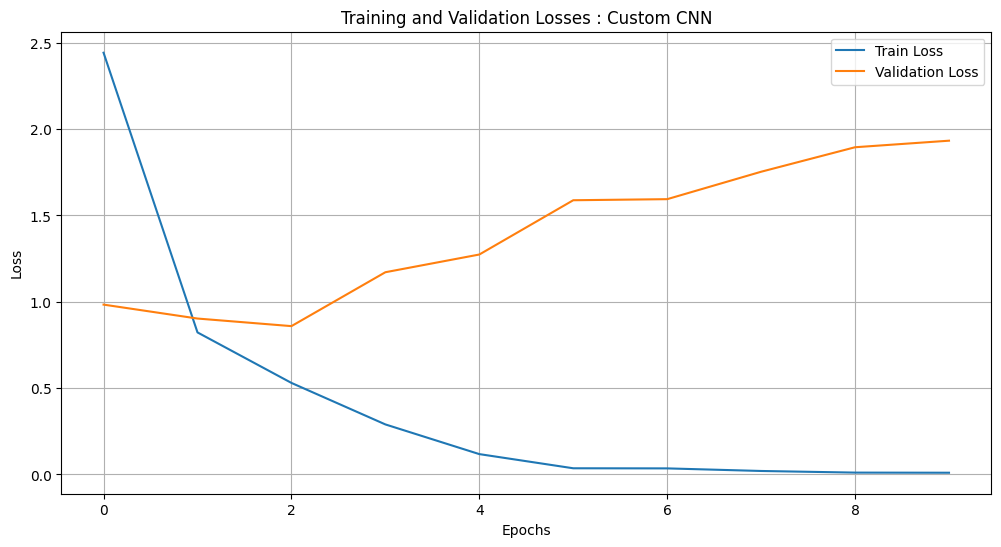

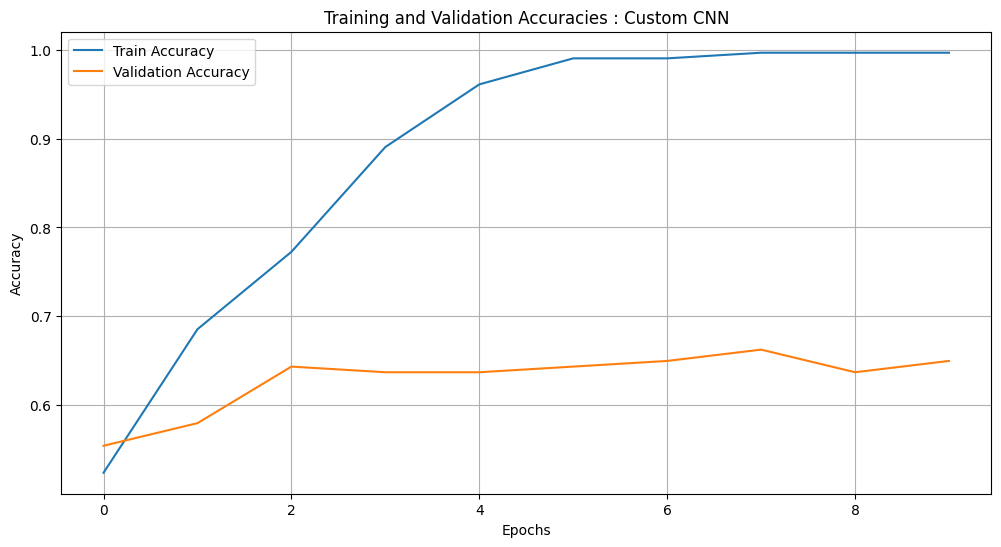

In [31]:
# Plotting the loss curves
plt.figure(figsize=(12, 6))
plt.plot(custom_train_losses, label='Train Loss')
plt.plot(custom_val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses : Custom CNN')
plt.grid()
plt.show()

# Plotting training and validation accuracy curves
plt.figure(figsize=(12, 6))
plt.plot(custom_train_accuracies, label='Train Accuracy')
plt.plot(custom_val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracies : Custom CNN')
plt.grid()
plt.show()

### Model Evaluation On Test Set (Classification Report) : Custom CNN

### Testing

In [29]:
# Testing
custom_model.eval()
custom_test_correct = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = custom_model(images)
        _, predicted = torch.max(outputs, 1)
        custom_test_correct += (predicted == labels).sum().item()

custom_test_accuracy = custom_test_correct / test_size
print(f"Test Accuracy: {custom_test_accuracy:.4f}")

Test Accuracy: 0.7044


In [22]:
custom_model.eval()
custom_total_predicted = []
custom_total_true = []

label_mapping = {0 : 'malignant' , 1 : 'benign' , 2 : 'normal'}

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = custom_model(images)
        _, predicted = torch.max(outputs, 1)

        # Convert predicted and true labels to numpy arrays
        predicted = predicted.cpu().numpy()
        true = labels.cpu().numpy()

        # Collect predicted and true labels for each batch
        custom_total_predicted.extend(predicted)
        custom_total_true.extend(true)

# Calculate classification report for all batches combined
classification_rep = classification_report(custom_total_true, custom_total_predicted, target_names=label_mapping.values())
print("Classification Report for Testing Data: Custom CNN")
print(classification_rep)

Classification Report for Testing Data: Custom CNN
              precision    recall  f1-score   support

   malignant       0.82      0.73      0.77        95
      benign       0.50      0.68      0.58        41
      normal       0.79      0.65      0.71        23

    accuracy                           0.70       159
   macro avg       0.70      0.69      0.69       159
weighted avg       0.73      0.70      0.71       159



### Confusion Matrix : Custom CNN

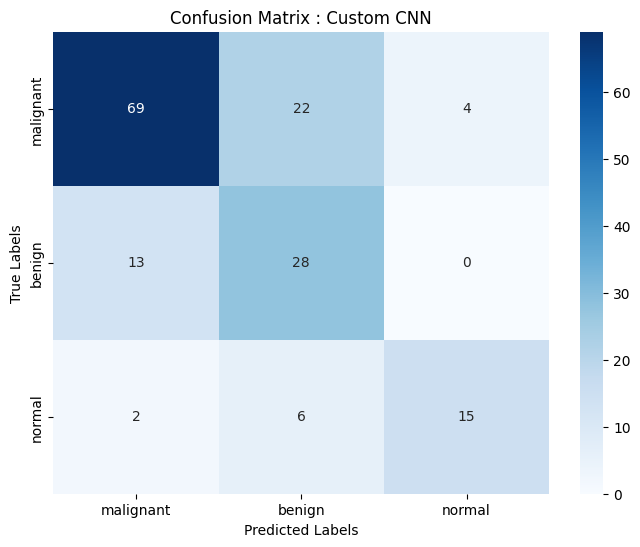

In [23]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(custom_total_true, custom_total_predicted)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.values(), yticklabels=label_mapping.values())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix : Custom CNN")
plt.show()

### Plotting Predicted Images : CNN

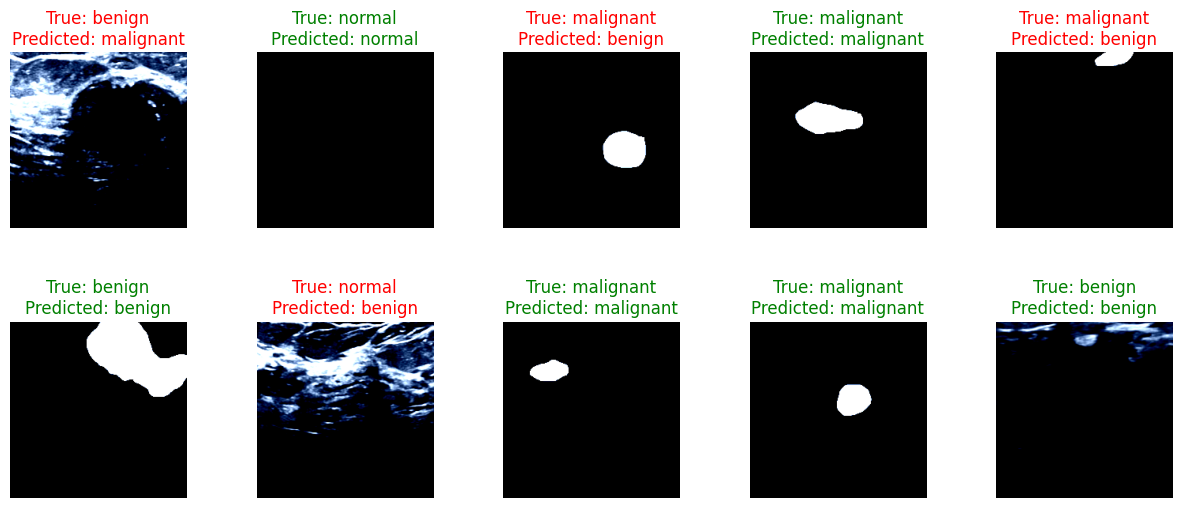

In [24]:
plot_images(test_loader, custom_model, label_mapping, device)